<a href="https://colab.research.google.com/github/yoheikikuta/PyTorch-check/blob/master/notebooks/adversarial_sticker_in_digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torchvision.models as models

In [2]:
resnet50 = models.resnet50(pretrained=True)
resnet50.eval()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:03<00:00, 28.8MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/STOP_sign.jpg/1200px-STOP_sign.jpg -O ./test.jpg
# !wget https://upload.wikimedia.org/wikipedia/commons/7/7f/Egyptian_Mau_Bronze.jpg -O ./test.jpg

--2019-11-27 10:22:18--  https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/STOP_sign.jpg/1200px-STOP_sign.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 397355 (388K) [image/jpeg]
Saving to: ‘./test.jpg’

./test.jpg          100%[===================>] 388.04K  --.-KB/s    in 0.08s   

2019-11-27 10:22:18 (5.04 MB/s) - ‘./test.jpg’ saved [397355/397355]



In [0]:
from skimage import io

In [0]:
img_array = io.imread("./test.jpg")

In [6]:
img_array.shape

(1296, 1200, 3)

In [0]:
import matplotlib.pyplot as plt

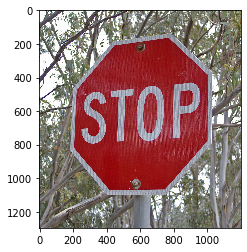

In [8]:
plt.figure()
plt.imshow(img_array)
plt.show()

In [0]:
from torchvision import transforms, utils

composed = transforms.Compose(
    [transforms.Resize((256, 256)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [0]:
import PIL

In [0]:
transformed_img = composed(PIL.Image.fromarray(img_array))

In [14]:
transformed_img.shape

torch.Size([3, 256, 256])

In [0]:
import copy

def plot_img(img_array, is_normalized=True):
    img_to_be_plotted = copy.deepcopy(img_array)
    assert len(img_array.shape) == 3
    if img_to_be_plotted.shape[0] == 3:
        img_to_be_plotted = img_to_be_plotted.transpose(1, 2, 0)
    if is_normalized:
        for idx, (m, v) in enumerate(zip([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])):
            img_to_be_plotted[:, :, idx] = (img_to_be_plotted[:, :, idx] * v) + m
    plt.figure()
    plt.imshow(img_to_be_plotted)
    plt.show()

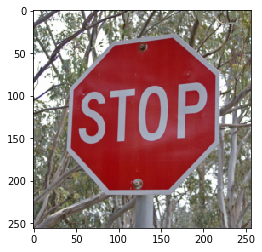

In [16]:
plot_img(transformed_img.detach().numpy())

In [17]:
transformed_img.unsqueeze(0).shape

torch.Size([1, 3, 256, 256])

In [0]:
pred = resnet50(transformed_img.unsqueeze(0))

In [19]:
pred.shape

torch.Size([1, 1000])

In [20]:
!wget https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json 

--2019-11-27 10:23:00--  https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.185.85
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.185.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [application/octet-stream]
Saving to: ‘imagenet_class_index.json’

imagenet_class_inde 100%[===================>]  34.53K  --.-KB/s    in 0.03s   

2019-11-27 10:23:00 (1.19 MB/s) - ‘imagenet_class_index.json’ saved [35363/35363]



In [0]:
import json

with open("./imagenet_class_index.json") as json_file:
    class_idx = json.load(json_file)

idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

In [0]:
import numpy as np

In [23]:
idx2label[np.argmax(pred.detach().numpy())]

'street_sign'

In [24]:
for elem in np.argsort(pred.detach().numpy())[0][-5:]:
    print(idx2label[elem])

mailbox
barn
traffic_light
water_tower
street_sign
